![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [1]:
# seu código
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seu código
cancel = pd.read_csv("Churn_Modelling.csv")
cancel

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
cancel.info() # 14 variáveis e 10000 observações no dataset e a variável Exited é a variável alvo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
cancel["Exited"].value_counts() # taxa churn é 20.37%

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
cancel.describe() #  A pontuação de crédito do cliente média é  650.53 pontos e tem cliente(s) de 92 anos.  
                  # 25% dos clientes possuem o índice de estabilidade de emprego maior a 7 e têm mais $127644.24 mil dólares na conta.
                  # 75% dos clientes usam um produto do banco e  quase 30% dos clientes não tem cartão de crédito.
                  # 51%  dos clientes fazem movimentação bancária constantemente e o salário médio anual estimado é de $100090 mil dólares.
                  # 20.37 % dos clientes romperam seu contrato com o banco.

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


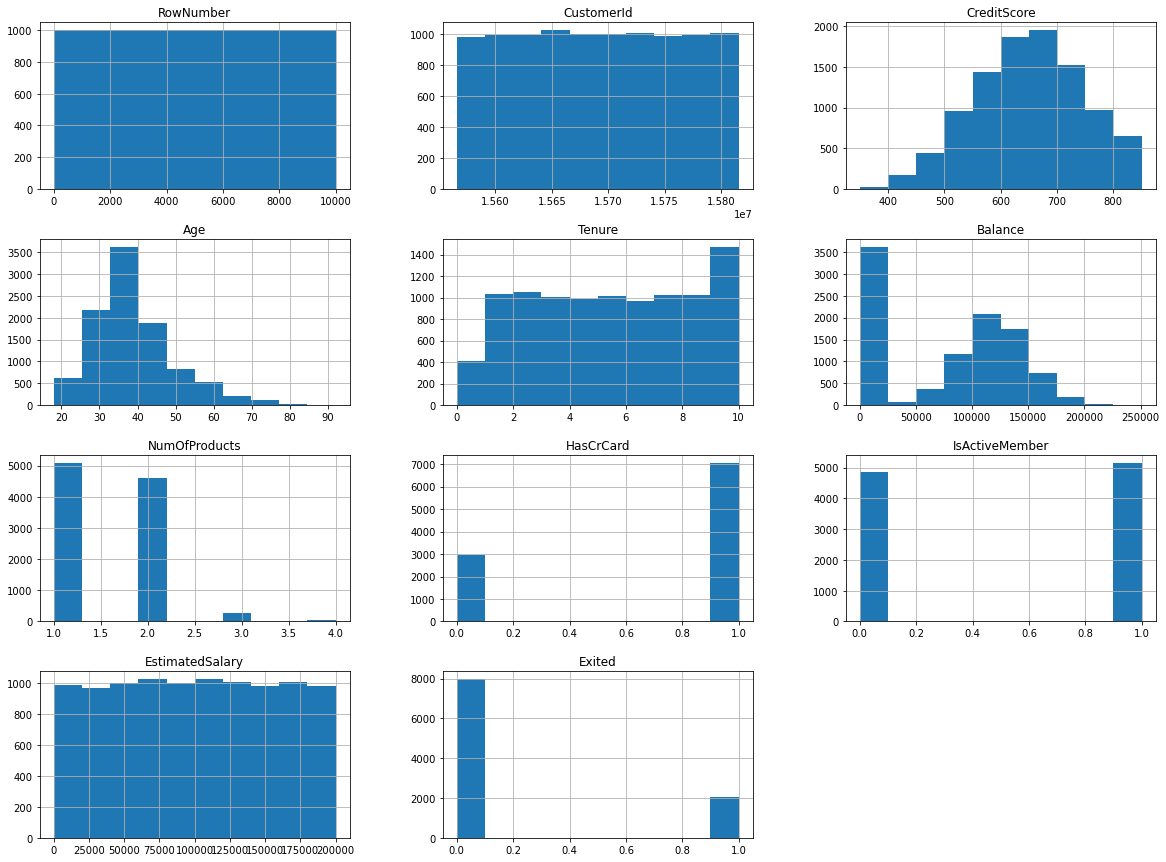

In [6]:
cancel.hist(figsize=(20,15))
plt.show()

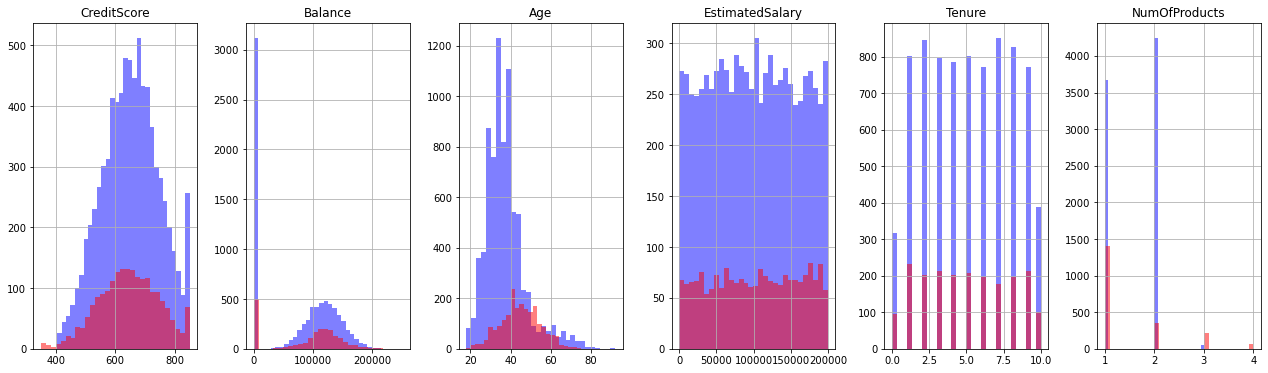

In [7]:
#  Distribuições de cada variável numérica em relação à variável alvo.
# Clientes  com mais idade e com maior  número de produtos bancários tende a cancelaram sua conta bancária.
cancel['Exited_cat']=cancel['Exited'].replace([0,1],['Não','Sim'])
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure', 'NumOfProducts']
fig, ax = plt.subplots(1, 6, figsize=(22, 6));
cancel[cancel.Exited_cat == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
cancel[cancel.Exited_cat == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

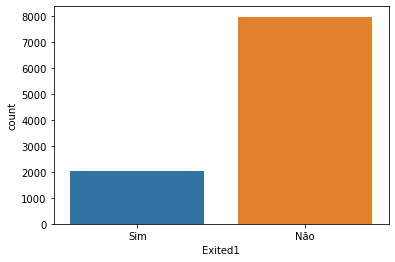

In [8]:
# 20% dos clientes dessa agência bancária abandonaram o serviço e existe um desbalanceamento em relação a variável Exited.
cancel['Exited1']=cancel['Exited'].replace([0,1],['Não','Sim'])
sns.countplot(data=cancel,x='Exited1');

In [9]:
# Variáveis categóricas em relação a variável Exited.
# As mulheres têm maior risco de Churn.
cancel_1 = cancel.groupby ('Gender'). Exited.mean (). reset_index () 
cancel_1

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


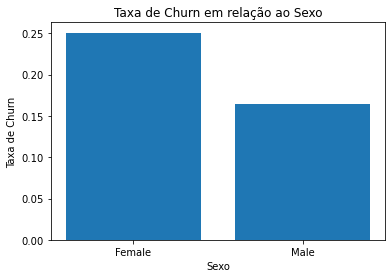

In [10]:
#Sexo em relação a variável churn
x =cancel_1['Gender']
y= cancel_1['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Sexo');
plt.xlabel('Sexo');
plt.ylabel('Taxa de Churn');

In [11]:
#País em relação a variável churn
#A porcentagem de Churn na Alemanha é 32.44%.
cancel_1 = cancel.groupby ('Geography'). Exited.mean (). reset_index () 
cancel_1

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


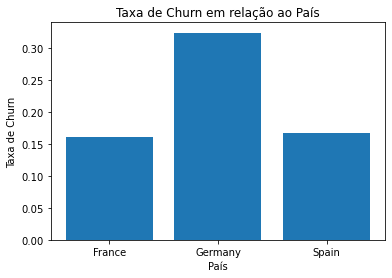

In [12]:
x =cancel_1['Geography']
y=cancel_1['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao País');
plt.xlabel('País');
plt.ylabel('Taxa de Churn');

In [13]:
# Cartão de crédito em relação a variável churn
# O cliente ter ou não cartão de crédito parece não influenciar no Churn
cancel['HasCrCard1']=cancel['HasCrCard'].replace([0,1],['Não','Sim'])
cancel_1 = cancel.groupby ('HasCrCard1'). Exited.mean (). reset_index () 
cancel_1

,HasCrCard1,Exited
0,Não,0.208149
1,Sim,0.201843


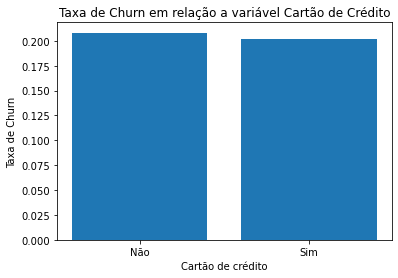

In [14]:
x =cancel_1['HasCrCard1']
y=cancel_1['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação a variável Cartão de Crédito');
plt.xlabel('Cartão de crédito');
plt.ylabel('Taxa de Churn');

In [15]:
# Variável Membro Ativo em relação a variável churn
# O Churn entre os clientes que não são ativos é quase o dobro do que os clientes ativos.
cancel['IsActiveMember1']=cancel['IsActiveMember'].replace([0,1],['Não','Sim'])
cancel_1 = cancel.groupby ('IsActiveMember'). Exited.mean (). reset_index () 
cancel_1

,IsActiveMember,Exited
0,0,0.268509
1,1,0.142691


In [16]:
# Variáveis numéricas
cancel_num=cancel[['Age','Balance','Tenure','NumOfProducts','EstimatedSalary']]
cancel_num

,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
0,42,0.00,2,1,101348.88
1,41,83807.86,1,1,112542.58
2,42,159660.80,8,3,113931.57
3,39,0.00,1,2,93826.63
4,43,125510.82,2,1,79084.10
...,...,...,...,...,...
9995,39,0.00,5,2,96270.64
9996,35,57369.61,10,1,101699.77
9997,36,0.00,7,1,42085.58
9998,42,75075.31,3,2,92888.52


In [17]:
corr_matrix = cancel_num.corr()
corr_matrix

,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
Age,1.000000,0.028308,-0.009997,-0.030680,-0.007201
Balance,0.028308,1.000000,-0.012254,-0.304180,0.012797
Tenure,-0.009997,-0.012254,1.000000,0.013444,0.007784
NumOfProducts,-0.030680,-0.304180,0.013444,1.000000,0.014204
EstimatedSalary,-0.007201,0.012797,0.007784,0.014204,1.000000


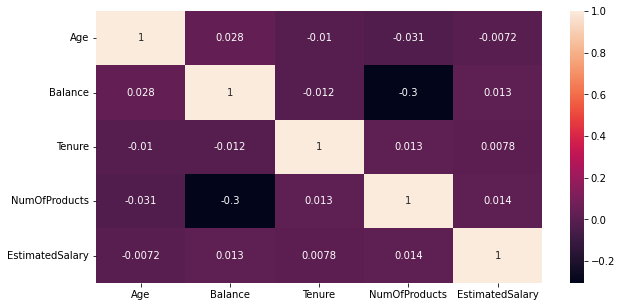

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(data=corr_matrix, annot=True);

In [19]:
# Variáveis quantitativas discretas
# Número de produtos em relação a variável churn
# Quanto o número de produtos é 3 ou 4  a taxa de Churn é muito elevada.
cancel_1 = cancel.groupby ('NumOfProducts').Exited.mean(). reset_index () 
cancel_1

,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


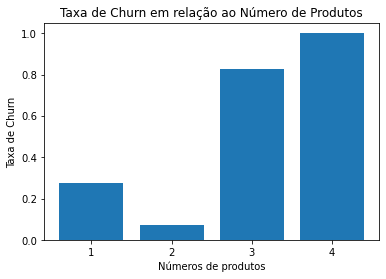

In [20]:
x =cancel_1['NumOfProducts']
y=cancel_1['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Número de Produtos');
plt.xlabel('Números de produtos');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (1,2,3,4));

In [21]:
# Taxa de Churn em relação ao Índice de Estabilidade no emprego
# O índice de estabilidade do emprego parece não influenciar a taxa de Churn
cancel_1 = cancel.groupby ('Tenure'). Exited.mean (). reset_index ()
cancel_1

,Tenure,Exited
0,0,0.230024
1,1,0.224155
2,2,0.191794
3,3,0.211100
4,4,0.205258
5,5,0.206522
6,6,0.202689
7,7,0.172179
8,8,0.192195
9,9,0.216463


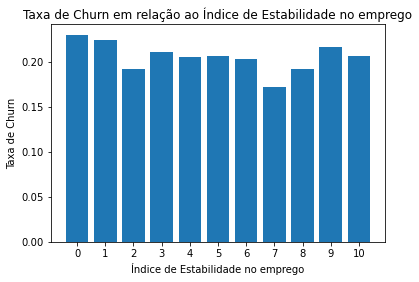

In [22]:
x =cancel_1['Tenure']
y=cancel_1['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Índice de Estabilidade no emprego');
plt.xlabel('Índice de Estabilidade no emprego');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (0,1,2,3,4,5,6,7,8,9,10));

Exited_cat
Não    72745.296779
Sim    91108.539337
Name: Balance, dtype: float64

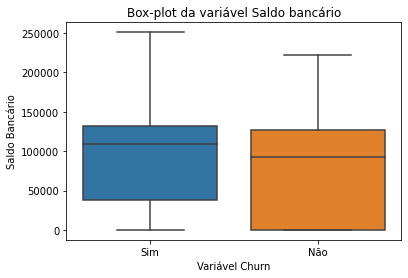

In [23]:
# Variáveis quantitativas contínuas
# Saldo bancario em relação ao Churn
# Clientes que cancelaram os serviços bancários possui um saldo bancários maior do que aqueles clientes que não cancelaram o serviço.
sns.boxplot(x="Exited_cat", y="Balance", data=cancel);
plt.title('Box-plot da variável Saldo bancário');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
cancel.groupby(['Exited_cat'])['Balance'].mean()

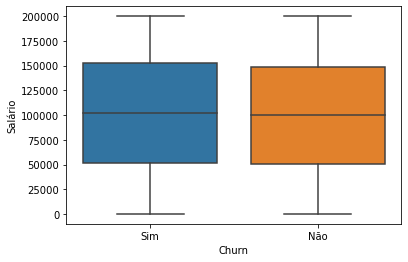

In [24]:
# Salário Estimado em relação ao Churn
# O salário estimado parece não influenciar no churn
sns.boxplot(x="Exited_cat", y="EstimatedSalary" , data=cancel);
cancel.groupby(['Exited'])['EstimatedSalary'].mean()
plt.xlabel('Churn');
plt.ylabel('Salário');

Text(0, 0.5, 'Taxa de Churn')

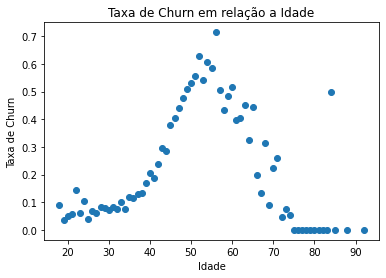

In [25]:
# Taxa de Churn em relação a Idade
# Clientes entre 50 e 60 anos tem uma alta taxa de Churn
cancel_1 = cancel.groupby ('Age'). Exited.mean (). reset_index () 
x = cancel_1['Age']
y = cancel_1['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação a Idade')
plt.xlabel('Idade')
plt.ylabel('Taxa de Churn')

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

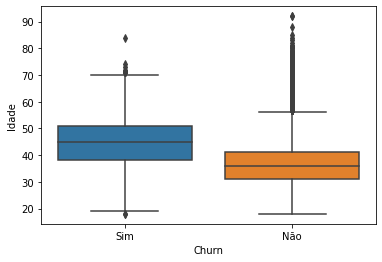

In [26]:
# Presença de outliers
sns.boxplot(x="Exited_cat", y="Age" , data=cancel);
plt.xlabel('Churn');
plt.ylabel('Idade');
cancel.groupby(['Exited'])['Age'].mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

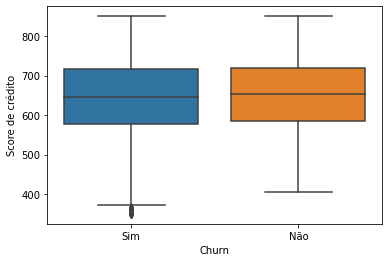

In [27]:
# Score do cliente em relação ao churn
# Clientes que cancelaram o serviço, possuí observações outliers na parte inferior
sns.boxplot(x="Exited_cat", y="CreditScore" , data=cancel);
plt.xlabel('Churn');
plt.ylabel('Score de crédito');
cancel.groupby(['Exited'])['CreditScore'].mean()

Text(0, 0.5, 'Taxa de Churn')

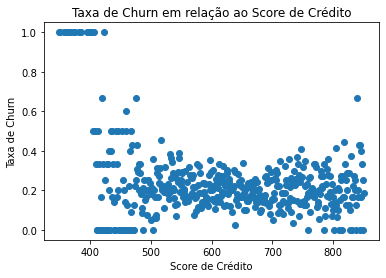

In [28]:
# A taxa de Churn é maior entre os clientes com baixo escore de crédito.
cancel_1 = cancel.groupby ('CreditScore'). Exited.mean (). reset_index () 
x =cancel_1['CreditScore']
y=cancel_1['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação ao Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Taxa de Churn')

### 3.2 Preparação e limpeza dos dados

In [29]:
# Eliminar as variáveis que não serão utilizadas
cancel1 = cancel.drop(columns = ['RowNumber','CustomerId','Surname', "Exited_cat", "Exited1", "HasCrCard1", "IsActiveMember1"])
cancel1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [30]:
# Identificando dados faltantes
# Nenhuma variável em estudo apresenta dados missing
cancel1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [31]:
# Separando as variaveis independentes e dependentes
y = cancel1['Exited']
X = cancel1
X = cancel1.drop('Exited',axis = 1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [32]:
# Separando as variáveis numéricas das categóricas
# #Variáveis Continuas
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure']
x_cont

['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']

In [33]:
#Variáveis Categóricas
x_cat = list(set(X)-set(x_cont))
x_cat
x_dummies=X[x_cat]
x_dummies

,IsActiveMember,HasCrCard,Gender,NumOfProducts,Geography
0,1,1,Female,1,France
1,1,0,Female,1,Spain
2,0,1,Female,3,France
3,0,0,Female,2,France
4,1,1,Female,1,Spain
...,...,...,...,...,...
9995,0,1,Male,2,France
9996,1,1,Male,1,France
9997,1,0,Female,1,France
9998,0,1,Male,2,Germany


In [34]:
#Substituindo a variável sexo para 0 e 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender']) 
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71
6,822,France,1,50,7,0.00,2,1,1,10062.80
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88
8,501,France,1,44,4,142051.07,2,0,1,74940.50
9,684,France,1,27,2,134603.88,1,1,1,71725.73


In [35]:
# Substituindo a variável país e numero de produtos numa nova variável binária
x_final = pd.get_dummies (data = X, columns=['Geography','NumOfProducts'] )
x_final

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,0.00,1,1,101348.88,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,0,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,1,0,96270.64,1,0,0,0,1,0,0
9996,516,1,35,10,57369.61,1,1,101699.77,1,0,0,1,0,0,0
9997,709,0,36,7,0.00,0,1,42085.58,1,0,0,1,0,0,0
9998,772,1,42,3,75075.31,1,0,92888.52,0,1,0,0,1,0,0


In [36]:
# Padronizar as variáveis contínuas
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_final[x_cont] = scaler.fit_transform(x_final[x_cont])
x_final[x_cont]

,CreditScore,Balance,Age,EstimatedSalary,Tenure
0,0.538,0.000000,0.324324,0.506735,0.2
1,0.516,0.334031,0.310811,0.562709,0.1
2,0.304,0.636357,0.324324,0.569654,0.8
3,0.698,0.000000,0.283784,0.469120,0.1
4,1.000,0.500246,0.337838,0.395400,0.2
...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.481341,0.5
9996,0.332,0.228657,0.229730,0.508490,1.0
9997,0.718,0.000000,0.243243,0.210390,0.7
9998,0.844,0.299226,0.324324,0.464429,0.3


### 3.4 Construção do modelo

In [37]:
#  Modelo de Churn
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino,y_teste  = train_test_split(x_final, y, test_size = 0.25,random_state = 42)
x_treino

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
4901,0.646,1,0.554054,0.0,0.709683,0,1,0.105271,1,0,0,0,1,0,0
4375,1.000,1,0.310811,0.8,0.242651,1,0,0.159086,0,1,0,1,0,0,0
6698,0.750,0,0.175676,0.6,0.000000,0,0,0.306604,1,0,0,1,0,0,0
9805,0.588,1,0.202703,0.7,0.695786,0,1,0.219679,1,0,0,1,0,0,0
1101,0.706,1,0.148649,0.9,0.000000,1,0,0.253364,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.836,1,0.486486,0.8,0.277853,1,1,0.346880,1,0,0,1,0,0,0
5191,0.664,0,0.540541,0.1,0.000000,1,1,0.003475,1,0,0,1,0,0,0
5390,0.770,0,0.270270,0.1,0.000000,0,0,0.461087,1,0,0,0,0,1,0
860,0.634,1,0.337838,0.8,0.758186,1,0,0.487529,1,0,0,1,0,0,0


# Modelo KNN

In [38]:
# Modelo KNN
# Utilizando k=5 que é o valor default da função Knn 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [39]:
# A matriz de confusão
# Utilizando k=5, temos muitos erros de predição
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1870  133  2003
1         293  204   497
All      2163  337  2500


In [40]:
# Acurácia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_teste, resultado_knn)
print('Acurácia: %f' % acuracia)

Acurácia: 0.829600


In [41]:
# Encontrando o melhor K
# O menor erro de predição é o modelo com K ideal
# Calculando o  error para K valores entre 1 e 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_treino, y_treino)
    pred_i = knn.predict(x_teste)
    error.append(np.mean(pred_i != y_teste))


Text(0, 0.5, 'Erro Médio')

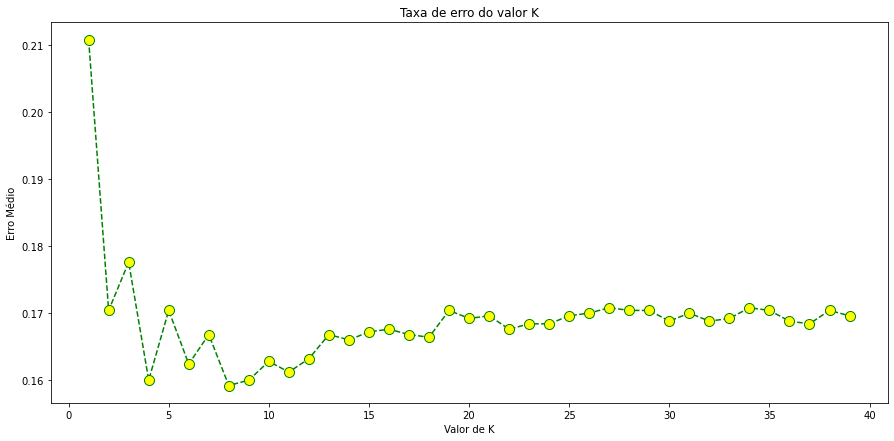

In [42]:
# O melhor k=8
plt.figure(figsize=(15, 7))
plt.plot(range(1, 40), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.title('Taxa de erro do valor K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')

In [43]:
# O modelo KNN considerando K=8
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=8)

In [44]:
# Temos muitos falsos negativos no modelo
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1938   65  2003
1         333  164   497
All      2271  229  2500


In [45]:
acuracia = accuracy_score(y_teste, resultado_knn)
print('Acurácia: %f' % acuracia)

Acurácia: 0.840800


# Modelo Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
# O modelo com 1000 árvores de decisão 
rf = RandomForestClassifier (n_estimators = 1000, random_state = 42) 
rf.fit (x_treino, y_treino);

In [47]:
# O modelo conseguiu melhores resultados
y_rf = rf.predict(x_teste)
print (pd.crosstab(y_teste,y_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1937   66  2003
1         259  238   497
All      2196  304  2500


In [48]:
acuracia = accuracy_score(y_teste, y_rf)
print('Acurácia: %f' % acuracia)

Acurácia: 0.870000


In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, y_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.48      0.59       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



In [50]:
#Analisando a importância de cada variável
rf.feature_importances_

feature_importances = pd.DataFrame(rf.feature_importances_, index = x_treino.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Age,0.229073
EstimatedSalary,0.144125
CreditScore,0.141607
Balance,0.141183
Tenure,0.084827
NumOfProducts_2,0.058943
NumOfProducts_3,0.040216
IsActiveMember,0.038493
NumOfProducts_1,0.031680
Geography_Germany,0.020898


# Modelo SVC

In [51]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(x_treino, y_treino)
result_svc = svc.predict(x_teste)
result_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
print (pd.crosstab(y_teste,result_svc, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1962   41  2003
1         330  167   497
All      2292  208  2500


In [53]:
acuracia = accuracy_score(y_teste, result_svc)
print('Acurácia: %f' % acuracia)

Acurácia: 0.851600


### 3.5 Avaliação do modelo

In [54]:
# Modelo SVC
svc.score(x_teste, y_teste)

0.8516

In [55]:
# Modelo Random Forest
# Usando o Random Forest alcançamos uma acurácia de 87%, escolhemos este como o melhor modelo.
# O Random Forest foi o modelo que conseguiu prever melhor o Churn.
rf.score(x_teste, y_teste)

0.87

In [56]:
# modelo KNN
knn.score(x_teste, y_teste)

0.8408

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.